In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
train=pd.read_csv("TechneX/ Data/train.csv")
test=pd.read_csv("TechneX/ Data/test.csv")

In [3]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


In [4]:
test.head()

,TEST_ID,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,25667,3686224,12300,67373.0,88453.0,1.0,0.0,2.0,0.0,235.775997,26.0,29.107299,0,0,3,2.1966
1,25668,3686225,45100,NaN,76653.0,0.0,1.0,11.0,0.0,298.300000,13.0,NaN,0,0,0,2.4432
2,25669,3686226,28400,129927.0,178898.0,1.0,3.0,2.0,NaN,114.942639,39.0,33.450162,0,0,0,1.0867
3,25670,3686227,8400,101049.0,115195.0,0.0,1.0,23.0,0.0,131.256329,12.0,36.515999,0,0,0,1.5343
4,25671,3686228,20000,16131.0,70572.0,1.0,1.0,NaN,0.0,243.365403,22.0,39.456251,0,0,0,2.3169


## Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
LOAN_ID         3576 non-null int64
AMOUNT          3576 non-null int64
DUE_MORTGAGE    3258 non-null float64
VALUE           3509 non-null float64
REASON          3419 non-null float64
OCC             3403 non-null float64
TJOB            3267 non-null float64
DCL             3239 non-null float64
CLT             3389 non-null float64
CL_COUNT        3446 non-null float64
RATIO           2825 non-null float64
CONVICTED       3576 non-null int64
VAR_1           3576 non-null int64
VAR_2           3576 non-null int64
VAR_3           3576 non-null float64
DEFAULTER       3576 non-null int64
dtypes: float64(10), int64(6)
memory usage: 447.1 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 16 columns):
TEST_ID         2384 non-null int64
LOAN_ID         2384 non-null int64
AMOUNT          2384 non-null int64
DUE_MORTGAGE    2184 non-null float64
VALUE           2339 non-null float64
REASON          2289 non-null float64
OCC             2278 non-null float64
TJOB            2178 non-null float64
DCL             2141 non-null float64
CLT             2263 non-null float64
CL_COUNT        2292 non-null float64
RATIO           1868 non-null float64
CONVICTED       2384 non-null int64
VAR_1           2384 non-null int64
VAR_2           2384 non-null int64
VAR_3           2384 non-null float64
dtypes: float64(10), int64(6)
memory usage: 298.1 KB


In [7]:
train.dtypes

LOAN_ID           int64
AMOUNT            int64
DUE_MORTGAGE    float64
VALUE           float64
REASON          float64
OCC             float64
TJOB            float64
DCL             float64
CLT             float64
CL_COUNT        float64
RATIO           float64
CONVICTED         int64
VAR_1             int64
VAR_2             int64
VAR_3           float64
DEFAULTER         int64
dtype: object

In [8]:
test.dtypes

TEST_ID           int64
LOAN_ID           int64
AMOUNT            int64
DUE_MORTGAGE    float64
VALUE           float64
REASON          float64
OCC             float64
TJOB            float64
DCL             float64
CLT             float64
CL_COUNT        float64
RATIO           float64
CONVICTED         int64
VAR_1             int64
VAR_2             int64
VAR_3           float64
dtype: object

In [9]:
train.describe()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
count,3.576000e+03,3576.000000,3258.000000,3509.000000,3419.000000,3403.000000,3267.000000,3239.000000,3389.000000,3446.000000,2825.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000
mean,3.684436e+06,18593.596197,74028.507532,101706.385571,0.690553,1.666765,8.895301,0.428836,181.339737,21.161056,33.650308,0.171141,0.218400,1.095358,1.658922,0.197707
std,1.032447e+03,10901.127719,44716.291776,55426.276328,0.462333,1.747940,7.591961,1.108302,83.487218,10.150044,7.873496,0.376685,0.768329,1.719366,0.662931,0.398326
min,3.682648e+06,1200.000000,1962.000000,7980.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.730295,0.000000,0.000000,0.000000,0.045274,0.000000
25%,3.683542e+06,11200.000000,46546.750000,66395.000000,0.000000,0.000000,3.000000,0.000000,117.437908,14.000000,29.161698,0.000000,0.000000,0.000000,1.184400,0.000000
50%,3.684436e+06,16400.000000,65849.500000,89569.000000,1.000000,1.000000,7.000000,0.000000,174.500000,20.000000,34.644236,0.000000,0.000000,0.000000,1.702700,0.000000
75%,3.685329e+06,23200.000000,91288.000000,120159.000000,1.000000,4.000000,13.000000,0.000000,233.333333,26.000000,38.958919,0.000000,0.000000,2.000000,2.188450,0.000000
max,3.686223e+06,89900.000000,399449.000000,849980.000000,1.000000,5.000000,41.000000,15.000000,640.058172,71.000000,143.959605,1.000000,10.000000,17.000000,2.779000,1.000000


In [10]:
test.describe()

,TEST_ID,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
count,2384.000000,2.384000e+03,2384.000000,2184.000000,2339.000000,2289.000000,2278.000000,2178.000000,2141.000000,2263.000000,2292.000000,1868.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,26858.500000,3.687416e+06,18879.530201,73109.820357,101830.554113,0.684578,1.696225,8.962718,0.480617,179.907476,21.499127,34.001045,0.170721,0.233221,1.068372,1.644087
std,688.345843,6.883458e+02,11652.133725,44073.373855,60217.968100,0.464785,1.769029,7.548495,1.154926,89.187508,10.121027,9.597070,0.376344,0.841718,1.634944,0.671643
min,25667.000000,3.686224e+06,1600.000000,2699.000000,12717.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.534499,0.000000,0.000000,0.000000,0.021750
25%,26262.750000,3.686820e+06,11100.000000,45502.750000,65482.500000,0.000000,0.000000,3.000000,0.000000,114.917280,15.000000,29.119563,0.000000,0.000000,0.000000,1.146300
50%,26858.500000,3.687416e+06,16500.000000,63955.500000,88711.000000,1.000000,1.000000,7.000000,0.000000,173.872146,20.000000,35.068381,0.000000,0.000000,0.000000,1.702850
75%,27454.250000,3.688011e+06,23600.000000,91630.750000,119574.500000,1.000000,4.000000,13.000000,0.000000,231.023364,27.000000,39.120483,0.000000,0.000000,2.000000,2.178025
max,28050.000000,3.688607e+06,90000.000000,399311.000000,855889.000000,1.000000,5.000000,36.000000,13.000000,1169.233561,64.000000,203.322149,1.000000,10.000000,14.000000,2.777700


### Missing Values

In [11]:
train.isnull().sum()

LOAN_ID           0
AMOUNT            0
DUE_MORTGAGE    318
VALUE            67
REASON          157
OCC             173
TJOB            309
DCL             337
CLT             187
CL_COUNT        130
RATIO           751
CONVICTED         0
VAR_1             0
VAR_2             0
VAR_3             0
DEFAULTER         0
dtype: int64

In [12]:
test.isnull().sum()

TEST_ID           0
LOAN_ID           0
AMOUNT            0
DUE_MORTGAGE    200
VALUE            45
REASON           95
OCC             106
TJOB            206
DCL             243
CLT             121
CL_COUNT         92
RATIO           516
CONVICTED         0
VAR_1             0
VAR_2             0
VAR_3             0
dtype: int64

### Univariate Analysis

In [13]:
train.columns

Index(['LOAN_ID', 'AMOUNT', 'DUE_MORTGAGE', 'VALUE', 'REASON', 'OCC', 'TJOB',
       'DCL', 'CLT', 'CL_COUNT', 'RATIO', 'CONVICTED', 'VAR_1', 'VAR_2',
       'VAR_3', 'DEFAULTER'],
      dtype='object')

In [14]:
## Missing Values Checking
train.AMOUNT.isnull().sum()

0

In [15]:
## Overview of the Feature
train.AMOUNT.describe()

count     3576.000000
mean     18593.596197
std      10901.127719
min       1200.000000
25%      11200.000000
50%      16400.000000
75%      23200.000000
max      89900.000000
Name: AMOUNT, dtype: float64

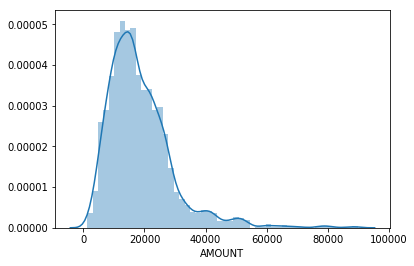

In [16]:
#Histogram
sns.distplot(train.AMOUNT,bins=50)

####  We can observe some outliers here.

Text(0.5,0,'Amount (Boxplot) ')

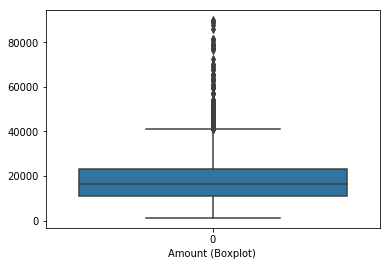

In [17]:
sns.boxplot(data=train.AMOUNT)
plt.xlabel("Amount (Boxplot) ")

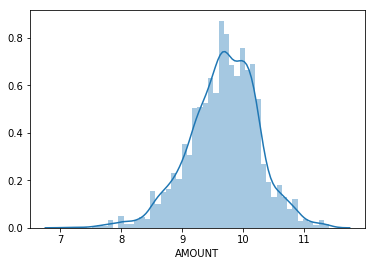

In [18]:
#Train Data
sns.distplot(np.log(train.AMOUNT),bins=50)

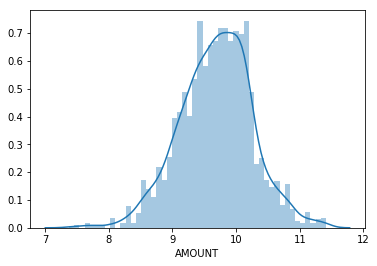

In [19]:
#Test Data
sns.distplot(np.log(test.AMOUNT),bins=50)

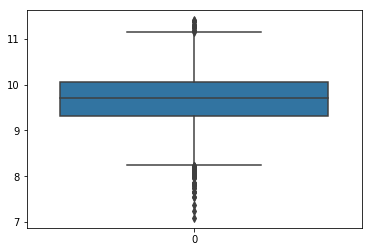

In [20]:
## Boxplot Train Data
sns.boxplot(data=np.log(train.AMOUNT))

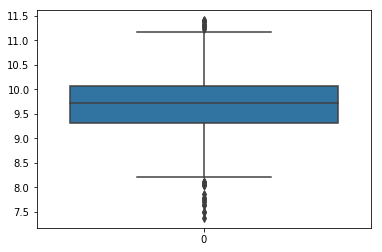

In [21]:
## Boxplot Test Data
sns.boxplot(data=np.log(test.AMOUNT))

In [22]:
#train.AMOUNT=np.log(train.AMOUNT)
#test.AMOUNT=np.log(test.AMOUNT)

In [23]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


### Due_Mortgage

In [24]:
train.DUE_MORTGAGE.describe()

count      3258.000000
mean      74028.507532
std       44716.291776
min        1962.000000
25%       46546.750000
50%       65849.500000
75%       91288.000000
max      399449.000000
Name: DUE_MORTGAGE, dtype: float64

In [25]:
## Missing Value Checking
print("Train Data Missing Values:",train.DUE_MORTGAGE.isnull().sum())
print("Test Data Missing Values:",test.DUE_MORTGAGE.isnull().sum())

Train Data Missing Values: 318
Test Data Missing Values: 200


In [26]:
## Missing Value Replacement with Median Value
train.DUE_MORTGAGE.fillna(train.DUE_MORTGAGE.median(),inplace=True)

In [27]:
test.DUE_MORTGAGE.fillna(test.DUE_MORTGAGE.median(),inplace=True)

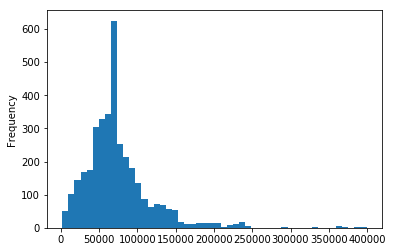

In [28]:
## Ploting Histogram
train.DUE_MORTGAGE.plot(kind='hist',bins=50)

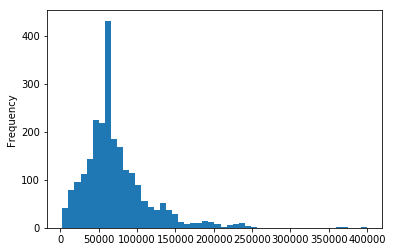

In [29]:
test.DUE_MORTGAGE.plot(kind='hist',bins=50)

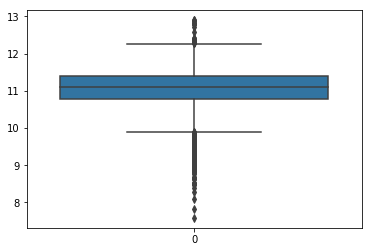

In [30]:
## Boxplot on Train Data
sns.boxplot(data=np.log(train.DUE_MORTGAGE))

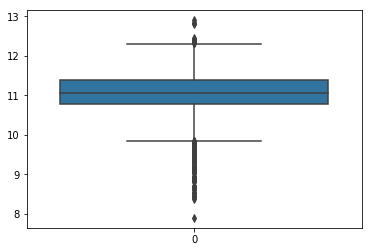

In [31]:
## Boxplot on Test Data
sns.boxplot(data=np.log(test.DUE_MORTGAGE))

In [32]:
#train.DUE_MORTGAGE=np.log(train.DUE_MORTGAGE)
#test.DUE_MORTGAGE=np.log(test.DUE_MORTGAGE)

In [33]:
train.columns

Index(['LOAN_ID', 'AMOUNT', 'DUE_MORTGAGE', 'VALUE', 'REASON', 'OCC', 'TJOB',
       'DCL', 'CLT', 'CL_COUNT', 'RATIO', 'CONVICTED', 'VAR_1', 'VAR_2',
       'VAR_3', 'DEFAULTER'],
      dtype='object')

### Value

In [34]:
train.VALUE.describe()

count      3509.000000
mean     101706.385571
std       55426.276328
min        7980.000000
25%       66395.000000
50%       89569.000000
75%      120159.000000
max      849980.000000
Name: VALUE, dtype: float64

In [35]:
test.VALUE.describe()

count      2339.000000
mean     101830.554113
std       60217.968100
min       12717.000000
25%       65482.500000
50%       88711.000000
75%      119574.500000
max      855889.000000
Name: VALUE, dtype: float64

In [36]:
print("Missing Values in Training Data:",train.VALUE.isnull().sum())
print("Missing Values in Test Data:",test.VALUE.isnull().sum())

Missing Values in Training Data: 67
Missing Values in Test Data: 45


In [37]:
train.VALUE.fillna(train.VALUE.mean(),inplace=True)
test.VALUE.fillna(test.VALUE.mean(),inplace=True)

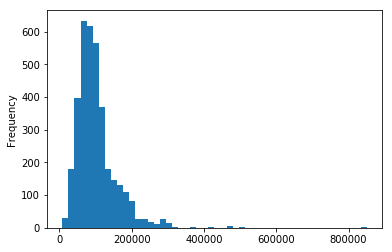

In [38]:
## Ploting Histogram
train.VALUE.plot(kind='hist',bins=50)

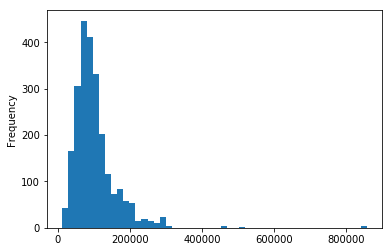

In [39]:
test.VALUE.plot(kind='hist',bins=50)

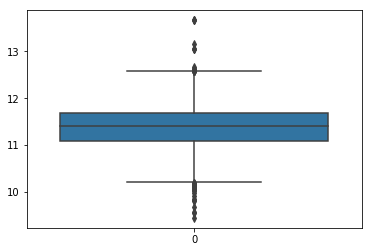

In [40]:
sns.boxplot(data=np.log(test.VALUE))

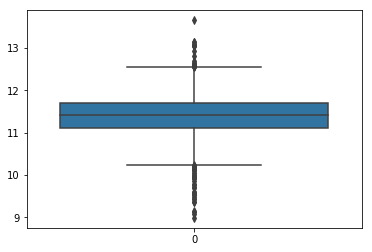

In [41]:
sns.boxplot(data=np.log(train.VALUE))

In [42]:
#train.VALUE=np.log(train.VALUE)
#test.VALUE=np.log(test.VALUE)

In [43]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,65849.5,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


### Reason

In [44]:
print("Missing Values in Training Data:",train.REASON.isnull().sum())
print("Missing Values in Test Data:",test.REASON.isnull().sum())

Missing Values in Training Data: 157
Missing Values in Test Data: 95


In [45]:
train.REASON.nunique()

2

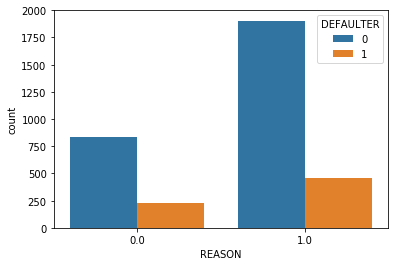

In [46]:
sns.countplot(x=train.REASON,hue=train.DEFAULTER)

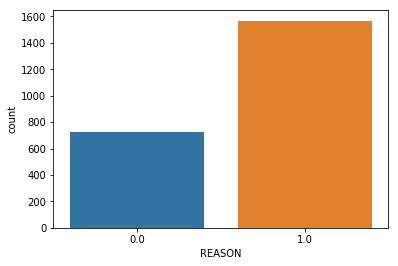

In [47]:
sns.countplot(x=test.REASON)

In [48]:
train.REASON.fillna(1.0,inplace=True)
test.REASON.fillna(1.0,inplace=True)

In [49]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,65849.5,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


### OCC

In [50]:
print("Missing Values in Training Data:",train.OCC.isnull().sum())
print("Missing Values in Test Data:",test.OCC.isnull().sum())

Missing Values in Training Data: 173
Missing Values in Test Data: 106


In [51]:
train.OCC.fillna(0.0,inplace=True)
test.OCC.fillna(0.0,inplace=True)

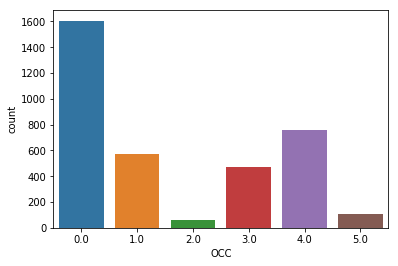

In [52]:
sns.countplot(x=train.OCC)

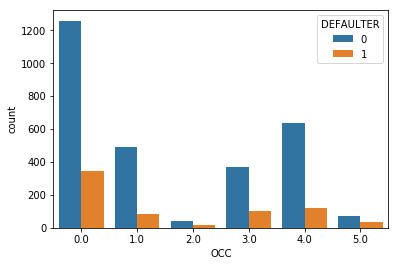

In [53]:
sns.countplot(x=train.OCC,hue=train.DEFAULTER)

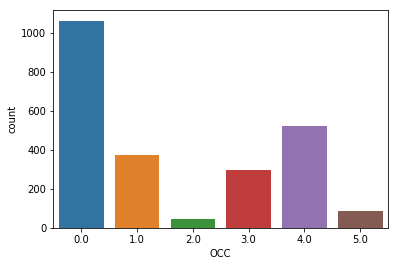

In [54]:
sns.countplot(x=test.OCC)

### TJOB

In [55]:
print("Missing Values in Training Data:",train.TJOB.isnull().sum())
print("Missing Values in Test Data:",test.TJOB.isnull().sum())

Missing Values in Training Data: 309
Missing Values in Test Data: 206


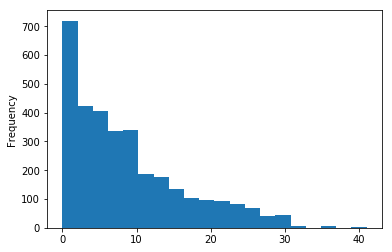

In [56]:
train.TJOB.plot(kind='hist',bins=20)

In [57]:
train.TJOB.fillna(train.TJOB.mean(),inplace=True)

In [58]:
test.TJOB.fillna(train.TJOB.mean(),inplace=True)

### CONVICTED

In [59]:
print("Missing Values in Training Data:",train.CONVICTED.isnull().sum())
print("Missing Values in Test Data:",test.CONVICTED.isnull().sum())

Missing Values in Training Data: 0
Missing Values in Test Data: 0


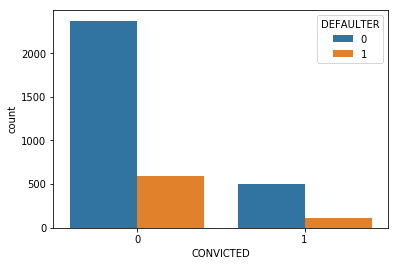

In [60]:
sns.countplot(x=train.CONVICTED,hue=train.DEFAULTER)

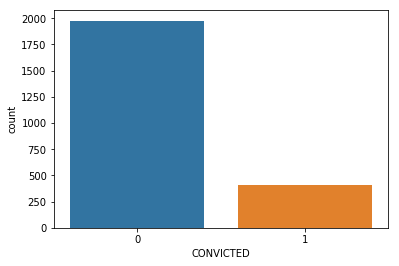

In [61]:
sns.countplot(x=test.CONVICTED)

### DCL

In [62]:
print("Missing Values in Training Data:",train.DCL.isnull().sum())
print("Missing Values in Test Data:",test.DCL.isnull().sum())

Missing Values in Training Data: 337
Missing Values in Test Data: 243


In [63]:
train.DCL.fillna(0.0,inplace=True)
test.DCL.fillna(0.0,inplace=True)

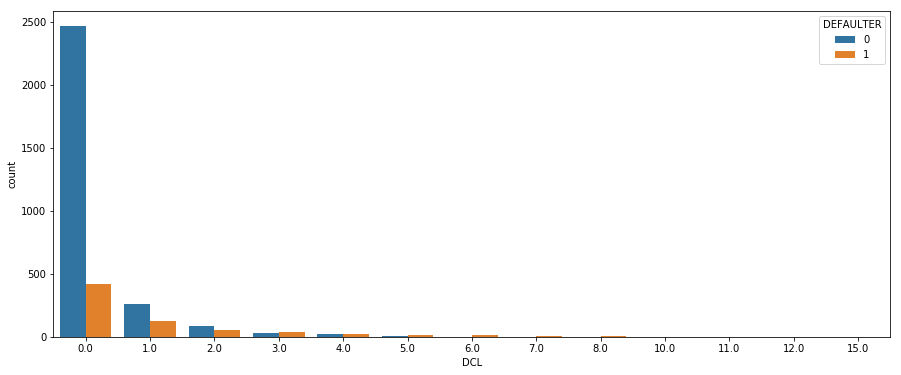

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(x=train.DCL,hue=train.DEFAULTER)

### CLT

In [65]:
print("Missing Values in Training Data:",train.CLT.isnull().sum())
print("Missing Values in Test Data:",test.CLT.isnull().sum())

Missing Values in Training Data: 187
Missing Values in Test Data: 121


In [66]:
train.CLT.fillna(train.CLT.median(),inplace=True)
test.CLT.fillna(train.CLT.median(),inplace=True)

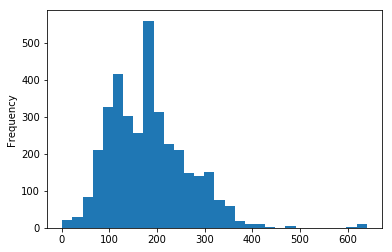

In [67]:
train.CLT.plot(kind='hist',bins=30)

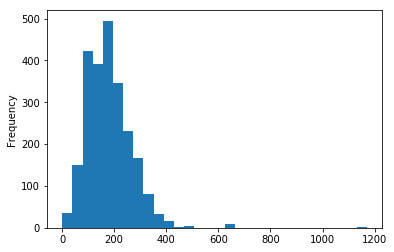

In [68]:
test.CLT.plot(kind='hist',bins=30)

In [69]:
#train.CLT=np.log(train.CLT)
#test.CLT=np.log(test.CLT)

### RATIO 

In [70]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.000000,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,8.895301,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.000000,0.0,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.000000,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,65849.5,35523.0,0.0,0.0,21.000000,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


In [71]:
train.RATIO.isnull().sum()

751

In [72]:
test.RATIO.isnull().sum()

516

In [73]:
#train.RATIO=
train.RATIO.fillna(train.RATIO.mean(),inplace=True)
#test.RATIO=
test.RATIO.fillna(train.RATIO.mean(),inplace=True)

In [74]:
train.isnull().sum()

LOAN_ID           0
AMOUNT            0
DUE_MORTGAGE      0
VALUE             0
REASON            0
OCC               0
TJOB              0
DCL               0
CLT               0
CL_COUNT        130
RATIO             0
CONVICTED         0
VAR_1             0
VAR_2             0
VAR_3             0
DEFAULTER         0
dtype: int64

In [75]:
test.isnull().sum()

TEST_ID          0
LOAN_ID          0
AMOUNT           0
DUE_MORTGAGE     0
VALUE            0
REASON           0
OCC              0
TJOB             0
DCL              0
CLT              0
CL_COUNT        92
RATIO            0
CONVICTED        0
VAR_1            0
VAR_2            0
VAR_3            0
dtype: int64

### CL_COUNT

In [76]:
train.CL_COUNT.describe()

count    3446.000000
mean       21.161056
std        10.150044
min         0.000000
25%        14.000000
50%        20.000000
75%        26.000000
max        71.000000
Name: CL_COUNT, dtype: float64

In [77]:
test.CL_COUNT.describe()

count    2292.000000
mean       21.499127
std        10.121027
min         0.000000
25%        15.000000
50%        20.000000
75%        27.000000
max        64.000000
Name: CL_COUNT, dtype: float64

In [78]:
train.CL_COUNT.isnull().sum()

130

In [79]:
train.CL_COUNT.fillna(train.CL_COUNT.mean(),inplace=True)
test.CL_COUNT.fillna(train.CL_COUNT.mean(),inplace=True)

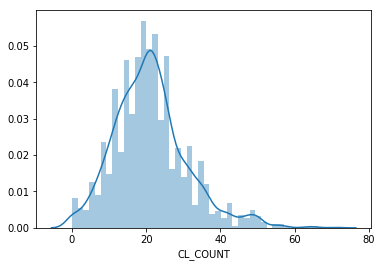

In [80]:
sns.distplot(train.CL_COUNT)

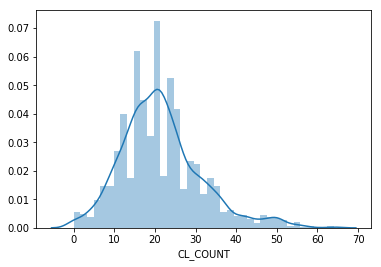

In [81]:
sns.distplot(test.CL_COUNT)

In [82]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.000000,0.0,119.166667,19.0,33.650308,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,8.895301,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.000000,0.0,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.000000,0.0,204.900000,40.0,33.650308,0,1,2,1.5701,1
4,3682652,24600,65849.5,35523.0,0.0,0.0,21.000000,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


In [83]:
test.head()

,TEST_ID,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
0,25667,3686224,12300,67373.0,88453.0,1.0,0.0,2.000000,0.0,235.775997,26.0,29.107299,0,0,3,2.1966
1,25668,3686225,45100,63955.5,76653.0,0.0,1.0,11.000000,0.0,298.300000,13.0,33.650308,0,0,0,2.4432
2,25669,3686226,28400,129927.0,178898.0,1.0,3.0,2.000000,0.0,114.942639,39.0,33.450162,0,0,0,1.0867
3,25670,3686227,8400,101049.0,115195.0,0.0,1.0,23.000000,0.0,131.256329,12.0,36.515999,0,0,0,1.5343
4,25671,3686228,20000,16131.0,70572.0,1.0,1.0,8.895301,0.0,243.365403,22.0,39.456251,0,0,0,2.3169


In [84]:
train.columns

Index(['LOAN_ID', 'AMOUNT', 'DUE_MORTGAGE', 'VALUE', 'REASON', 'OCC', 'TJOB',
       'DCL', 'CLT', 'CL_COUNT', 'RATIO', 'CONVICTED', 'VAR_1', 'VAR_2',
       'VAR_3', 'DEFAULTER'],
      dtype='object')

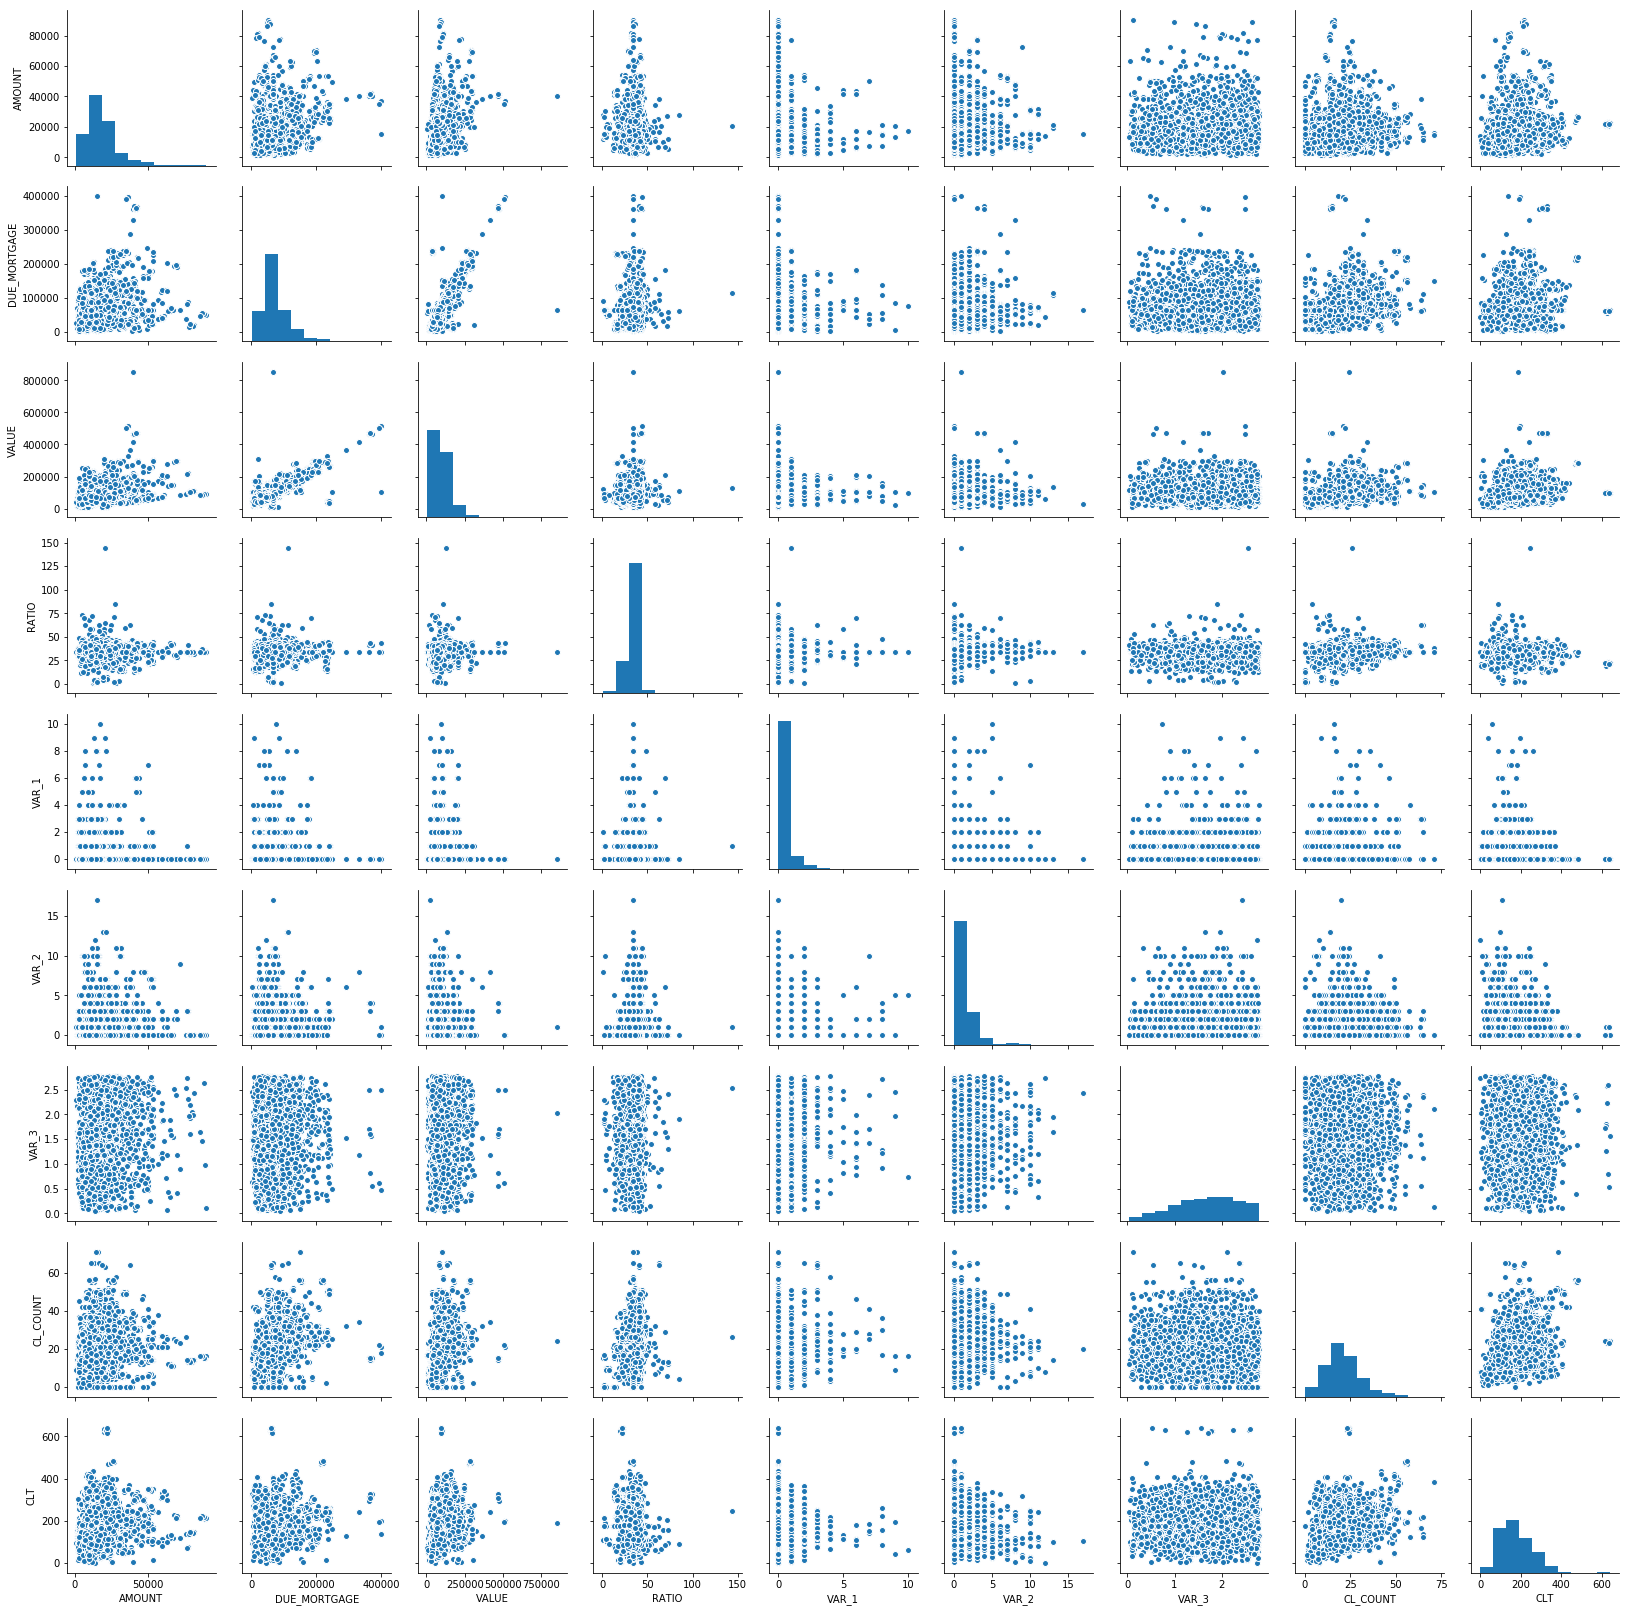

In [85]:
sns.pairplot(train[['AMOUNT','DUE_MORTGAGE','VALUE','RATIO','VAR_1','VAR_2','VAR_3','CL_COUNT','CLT']])

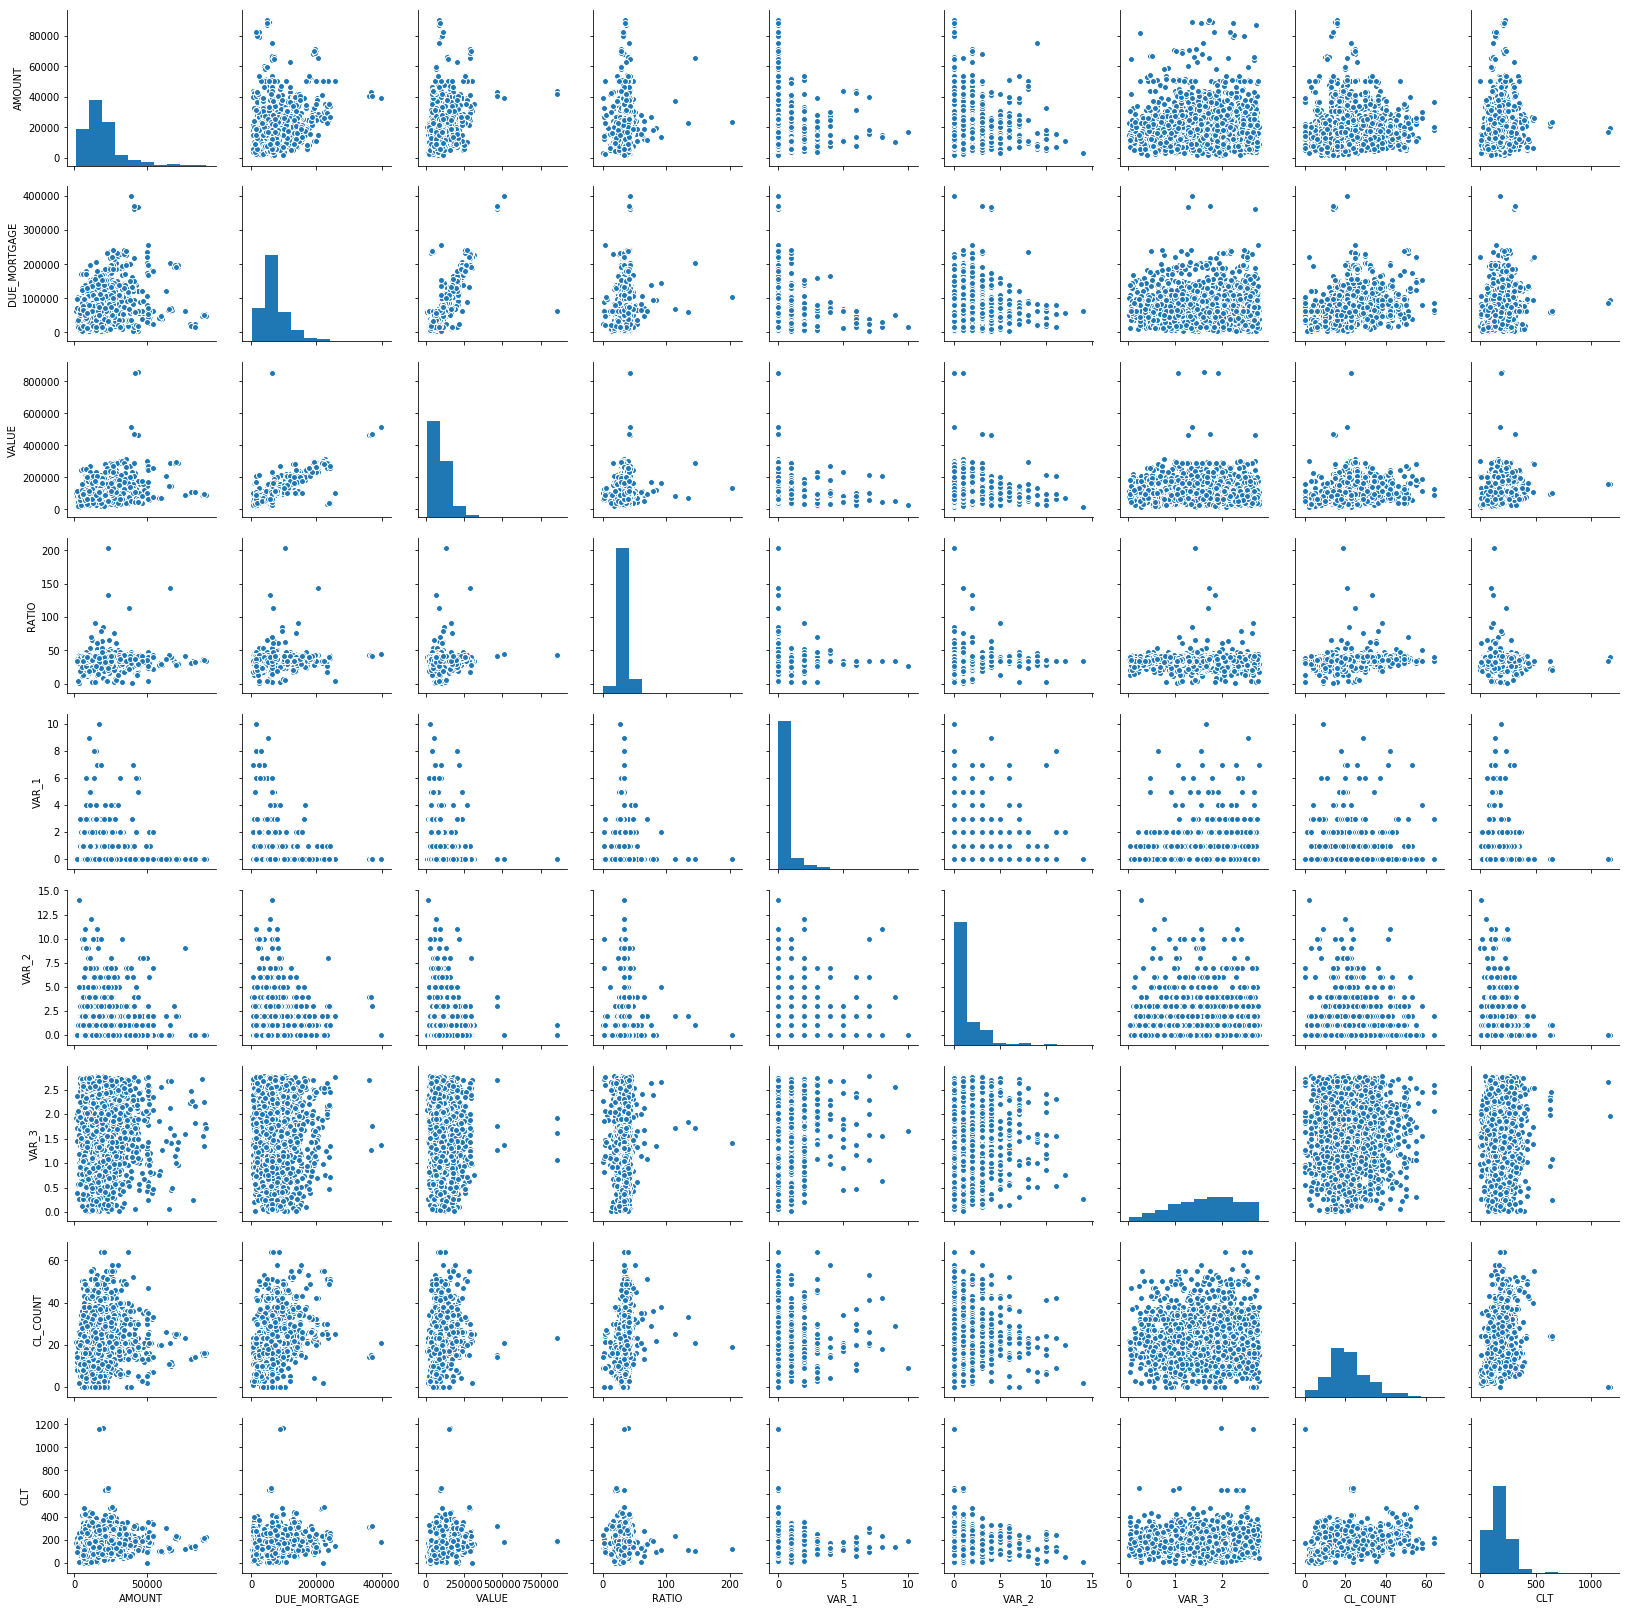

In [86]:
sns.pairplot(test[['AMOUNT','DUE_MORTGAGE','VALUE','RATIO','VAR_1','VAR_2','VAR_3','CL_COUNT','CLT']])

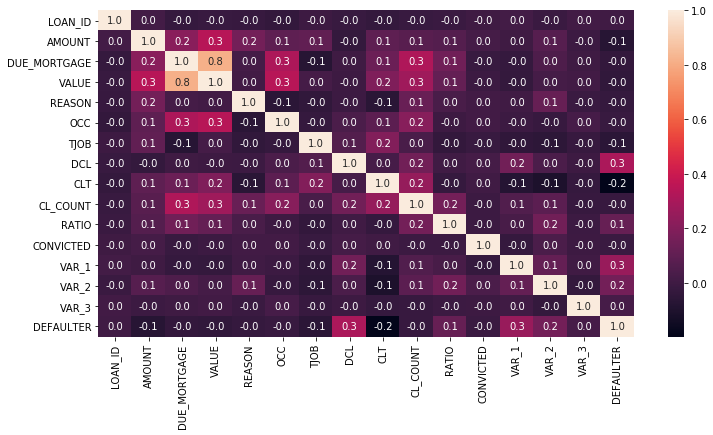

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True, fmt='.1f')

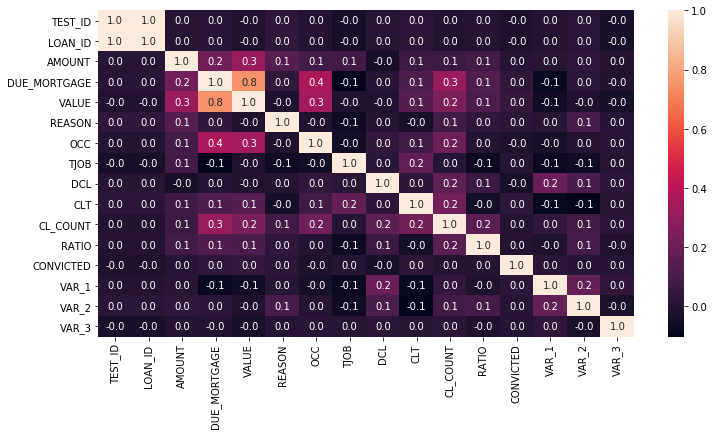

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(test.corr(),annot=True, fmt='.1f')

In [89]:
train.to_csv("Cleaned_Train.csv",index=False)
test.to_csv("Cleaned_Test.csv",index=False)

## Modelling

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [91]:
X=train.iloc[:,1:-1]
y=train['DEFAULTER']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101)

In [93]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [94]:
## Scoring Function
def Score(model,X_train,y_train,X_test,y_test,train=True):
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_val_score
    if train==True:
        print("Training Result \n")
        print("ROC AOC Value:  {0:0.4f} \n".format(roc_auc_score(y_train,model.predict(X_train))))
        scores=cross_val_score(estimator=model,X=X_train,y=y_train,cv=15,scoring='roc_auc',n_jobs=-1)
        print("Cross-Validation Score:",scores.mean())
        print("\nStandard Deviation:",scores.std())
    elif train==False:
        print("TestResult \n")
        print("ROC AOC Value:  {0:0.4f} \n".format(roc_auc_score(y_test,model.predict(X_test))))

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model_LR=LogisticRegression()

In [97]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
Score(model_LR,X_train,y_train,X_test,y_test,train=True)

Training Result 

ROC AOC Value:  0.6410 

Cross-Validation Score: 0.782440704871

Standard Deviation: 0.0462547415872


In [99]:
Score(model_LR,X_train,y_train,X_test,y_test,train=False)

TestResult 

ROC AOC Value:  0.6372 



In [100]:
sc.transform(test.iloc[:,2:])

array([[-0.57870434, -0.1250005 , -0.23311129, ..., -0.28681466,
         1.10179161,  0.81579304],
       [ 2.41017517, -0.20775438, -0.4523272 , ..., -0.28681466,
        -0.63134921,  1.18671012],
       [ 0.8883981 ,  1.3897284 ,  1.44714155, ..., -0.28681466,
        -0.63134921, -0.85363463],
       ..., 
       [-0.89763965, -0.35295807, -0.6579443 , ..., -0.28681466,
         1.10179161,  0.56069355],
       [-0.14130734,  0.02440445,  0.11267395, ..., -0.28681466,
         0.524078  ,  1.52212986],
       [ 0.5968001 ,  0.01844762,  0.26090478, ..., -0.28681466,
         0.524078  ,  1.55221235]])

In [101]:
train.shape

(3576, 16)

In [102]:
test.shape

(2384, 16)

In [141]:
pred_LR=model_LR.predict_proba(sc.transform(test.iloc[:,2:]))[:,1]

In [142]:
pred_LR

array([ 0.0926221 ,  0.02761395,  0.10104724, ...,  0.10281722,
        0.11115979,  0.263594  ])

## XGBoost

In [105]:
import xgboost as xgb

/home/tanmoy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [106]:
train_val=train.iloc[:2860,]
test_val=train.iloc[2860:,]

In [107]:
params={"learning_rate":0.1, 
        "n_estimators":1000, 
        "max_depth":8, 
        "min_child_weight":6, 
        "gamma":0.1, 
        "subsample":0.95,
        "colsample_bytree":0.95, 
        "reg_alpha":2, 
        "objective":'binary:logistic',
        "eval_metric": 'auc',
        "scale_pos_weight":1, 
        }

In [108]:
train.columns

Index(['LOAN_ID', 'AMOUNT', 'DUE_MORTGAGE', 'VALUE', 'REASON', 'OCC', 'TJOB',
       'DCL', 'CLT', 'CL_COUNT', 'RATIO', 'CONVICTED', 'VAR_1', 'VAR_2',
       'VAR_3', 'DEFAULTER'],
      dtype='object')

In [109]:
predictors=['AMOUNT', 
            'DUE_MORTGAGE', 
            'VALUE', 
            'REASON', 
            'OCC', 
            'TJOB',
            'DCL', 
            'CLT', 
            'CL_COUNT', 
            'RATIO', 
            'CONVICTED', 
            'VAR_1', 
            'VAR_2',
            'VAR_3']

outcome='DEFAULTER'


In [110]:
dtrain = xgb.DMatrix(data=train.loc[:,predictors], label= train.loc[:,outcome])
dtest = xgb.DMatrix(data=test.loc[:,predictors])

In [111]:
print(train_val.loc[:,predictors].shape)
print(train_val.loc[:,outcome].shape)

print(test_val.loc[:,predictors].shape)
print(test_val.loc[:,outcome].shape)

(2860, 14)
(2860,)
(716, 14)
(716,)


In [112]:
num_rounds = 10000

In [143]:
model_cv = xgb.cv(params, dtrain, num_rounds, nfold=10, early_stopping_rounds=20, stratified=True,verbose_eval=20)

[0]	train-auc:0.875245+0.0142427	test-auc:0.854786+0.0224815
[20]	train-auc:0.938289+0.00298064	test-auc:0.901999+0.0204051
[40]	train-auc:0.962918+0.00185194	test-auc:0.911731+0.0184449
[60]	train-auc:0.977268+0.00143212	test-auc:0.920204+0.0184826
[80]	train-auc:0.985909+0.00091146	test-auc:0.926702+0.0174301
[100]	train-auc:0.990877+0.000577898	test-auc:0.929731+0.0168489
[120]	train-auc:0.993874+0.000556183	test-auc:0.931969+0.0166536
[140]	train-auc:0.995751+0.000368072	test-auc:0.933288+0.0166085
[160]	train-auc:0.996995+0.000272074	test-auc:0.934289+0.0160113
[180]	train-auc:0.997871+0.000222573	test-auc:0.934879+0.0157482
[200]	train-auc:0.998436+0.000188606	test-auc:0.935528+0.0155299
[220]	train-auc:0.998824+0.000123933	test-auc:0.93643+0.0155122


In [144]:
model_XGB = xgb.train(params, dtrain, num_boost_round =238)

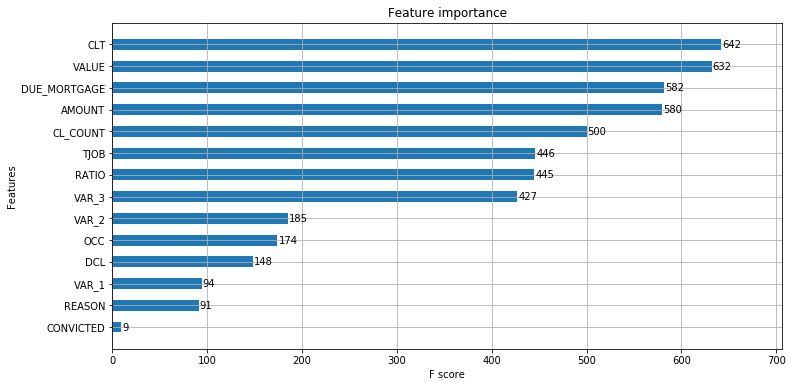

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
xgb.plot_importance(model_XGB, height=0.5, ax=ax)

In [146]:
pred_XGB=model_XGB.predict(dtest)

In [147]:
pred_XGB

array([ 0.00323994,  0.05736435,  0.02515859, ...,  0.00344697,
        0.03002462,  0.04402075], dtype=float32)

In [148]:
pred_LR

array([ 0.0926221 ,  0.02761395,  0.10104724, ...,  0.10281722,
        0.11115979,  0.263594  ])

## Ensembling

In [149]:
final_pred=pred_XGB*0.90 + 0.10*pred_LR

In [150]:
## Submission
submission=pd.read_csv("TechneX/ Data/sample_submission.csv")
submission.LOAN_ID=test.LOAN_ID
submission.DEFAULTER=final_pred

In [151]:
#submission.DEFAULTER[submission['DEFAULTER']>0]=0
#submission.DEFAULTER=submission.DEFAULTER.astype(int)

In [152]:
submission.head()

,LOAN_ID,DEFAULTER
0,3686224,0.012178
1,3686225,0.054389
2,3686226,0.032747
3,3686227,0.022403
4,3686228,0.011906


In [153]:
submission.to_csv("Final_Predictions.csv",index=False)

## Experiments

In [125]:
dtrain_1 = xgb.DMatrix(data=train_val.loc[:,predictors], label= train_val.loc[:,outcome])
dtest_1 = xgb.DMatrix(data=test_val.loc[:,predictors], label= test_val.loc[:,outcome])

In [126]:
watchlist = [(dtrain_1, 'train'),(dtest_1, 'eval')]

num_rounds = 10000

model = xgb.train(params, dtrain_1, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=25)

[0]	train-auc:0.876979	eval-auc:0.880603
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[25]	train-auc:0.940233	eval-auc:0.920661
[50]	train-auc:0.96851	eval-auc:0.933688
[75]	train-auc:0.982759	eval-auc:0.943898
[100]	train-auc:0.989823	eval-auc:0.948208
[125]	train-auc:0.993425	eval-auc:0.949313
[150]	train-auc:0.995586	eval-auc:0.951195
[175]	train-auc:0.997149	eval-auc:0.952919
[200]	train-auc:0.998007	eval-auc:0.953501
[225]	train-auc:0.998532	eval-auc:0.953477
[250]	train-auc:0.998875	eval-auc:0.953659
[275]	train-auc:0.999086	eval-auc:0.95406
[300]	train-auc:0.999265	eval-auc:0.954121
[325]	train-auc:0.999442	eval-auc:0.954108
[350]	train-auc:0.999568	eval-auc:0.954351
[375]	train-auc:0.999654	eval-auc:0.953999
Stopping. Best iteration:
[339]	train-auc:0.99952	eval-auc:0.954776



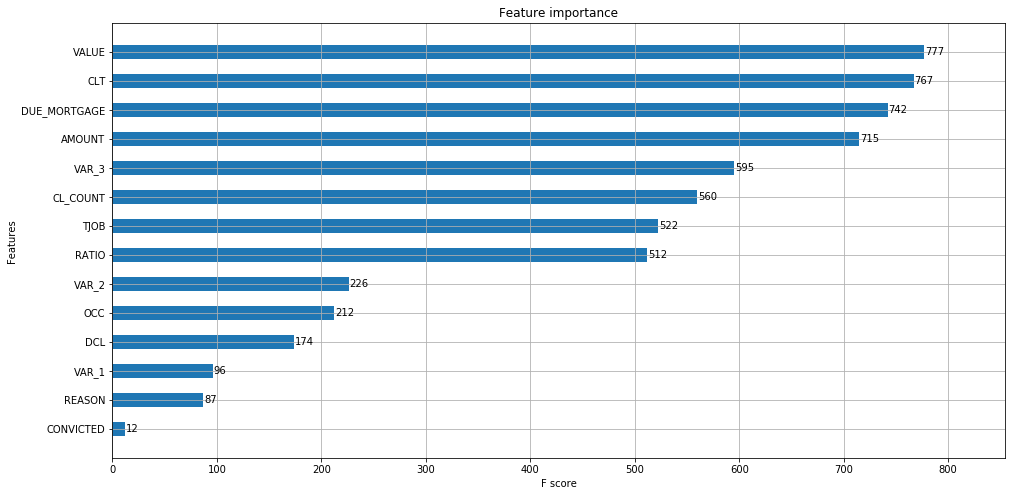

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
xgb.plot_importance(model, height=0.5, ax=ax)